In [1]:
# imports

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Using TensorFlow backend.


In [2]:
# parameters setup

imgs_path = "../input/style/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5 # number of most similar images to retrieve

In [3]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

553467904/553467096 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_po

In [4]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "png" in x]

print("number of images:",len(files))

number of images: 2184


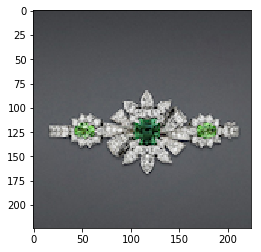

image loaded successfully!


In [5]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [6]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [7]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.       , 2.7867146, 2.214836 , ..., 3.3014448, 0.       ,
        0.       ]], dtype=float32)

In [8]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())


In [9]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2184, 4096)

In [10]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
# len(cos_similarities_df.columns)
cos_similarities_df.head()

,../input/style/4_7_026.png,../input/style/5_0_037.png,../input/style/0_0_083.png,../input/style/6_7_006.png,../input/style/3_8_011.png,../input/style/6_3_003.png,../input/style/2_7_005.png,../input/style/0_2_027.png,../input/style/2_1_031.png,../input/style/4_5_017.png,../input/style/3_2_058.png,../input/style/4_5_026.png,../input/style/4_9_033.png,../input/style/4_2_037.png,../input/style/3_3_006.png,../input/style/3_7_007.png,../input/style/3_0_056.png,../input/style/2_1_016.png,../input/style/0_0_055.png,../input/style/4_2_067.png,../input/style/1_6_026.png,../input/style/4_8_003.png,../input/style/3_5_010.png,../input/style/4_9_039.png,../input/style/5_2_045.png,../input/style/6_3_038.png,../input/style/6_8_014.png,../input/style/4_6_017.png,../input/style/0_1_004.png,../input/style/3_6_014.png,../input/style/6_3_045.png,../input/style/0_3_002.png,../input/style/0_1_021.png,../input/style/4_1_036.png,../input/style/1_0_001.png,../input/style/2_2_060.png,../input/style/2_8_018.png,../input/style/1_1_005.png,../input/style/0_8_027.png,../input/style/5_4_014.png,...,../input/style/4_8_002.png,../input/style/2_2_009.png,../input/style/3_6_007.png,../input/style/3_4_006.png,../input/style/6_7_005.png,../input/style/2_0_065.png,../input/style/6_9_019.png,../input/style/3_9_019.png,../input/style/5_2_035.png,../input/style/5_2_001.png,../input/style/0_0_038.png,../input/style/2_0_025.png,../input/style/0_0_040.png,../input/style/2_2_034.png,../input/style/0_3_012.png,../input/style/0_2_025.png,../input/style/4_8_009.png,../input/style/6_2_012.png,../input/style/5_2_071.png,../input/style/3_0_036.png,../input/style/6_2_017.png,../input/style/1_0_030.png,../input/style/4_6_072.png,../input/style/5_6_020.png,../input/style/4_6_010.png,../input/style/6_0_050.png,../input/style/4_2_040.png,../input/style/6_7_018.png,../input/style/5_2_021.png,../input/style/0_0_087.png,../input/style/4_4_012.png,../input/style/1_1_018.png,../input/style/2_0_018.png,../input/style/6_3_020.png,../input/style/4_4_010.png,../input/style/0_2_014.png,../input/style/3_8_006.png,../input/style/2_2_008.png,../input/style/3_0_031.png,../input/style/1_2_013.png
../input/style/4_7_026.png,1.000000,0.300163,0.228069,0.291597,0.306693,0.295195,0.475867,0.340382,0.269958,0.240994,0.282966,0.383669,0.720869,0.294479,0.264024,0.281868,0.377889,0.212547,0.289655,0.350354,0.364716,0.227717,0.251714,0.615218,0.331995,0.237963,0.245679,0.486456,0.300474,0.275708,0.283226,0.309260,0.342572,0.289772,0.275020,0.340452,0.236132,0.201184,0.251108,0.280971,...,0.224467,0.333002,0.373739,0.396048,0.315568,0.393362,0.259398,0.616468,0.267462,0.390777,0.384430,0.286364,0.242852,0.284783,0.345585,0.193582,0.271156,0.277681,0.308708,0.329248,0.278307,0.259943,0.542539,0.317283,0.364107,0.245838,0.288495,0.386780,0.266387,0.288320,0.529328,0.260538,0.249275,0.229877,0.342888,0.313435,0.264029,0.331847,0.307012,0.321818
../input/style/5_0_037.png,0.300163,1.000000,0.277738,0.346273,0.381764,0.196980,0.263078,0.229625,0.233744,0.156206,0.383296,0.176165,0.270723,0.309230,0.241972,0.288671,0.475385,0.206645,0.366246,0.257550,0.245252,0.333895,0.347938,0.361358,0.389501,0.244877,0.316148,0.393958,0.265116,0.307434,0.253576,0.194193,0.235833,0.253719,0.427006,0.323630,0.324532,0.199252,0.352667,0.239707,...,0.347948,0.261971,0.385980,0.289508,0.337311,0.446247,0.352255,0.477381,0.247762,0.269273,0.469147,0.444974,0.315272,0.366997,0.260758,0.230617,0.319768,0.317154,0.266872,0.471207,0.282799,0.409162,0.211472,0.448609,0.239862,0.389008,0.231610,0.292514,0.264545,0.430817,0.186644,0.182390,0.405376,0.260864,0.261055,0.299284,0.275440,0.264756,0.481118,0.240318
../input/style/0_0_083.png,0.228069,0.277738,1.000000,0.301510,0.319532,0.246226,0.237513,0.261067,0.220119,0.135225,0.293437,0.246055,0.185796,0.314279,0.267905,0.260632,0.347242,0.194725,0.408856,0.165736,0.307276,0.346440,0.342507,0.197114,0.381862,0.245421,0.428893,0.313708,0.308009,0.241282,0.306681,0.239586,0.257244,0.258728,

In [11]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    plt.title("Original product",color='b')
    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.title("similarity score :"+str(closest_imgs_scores[i]), color='b')
        plt.imshow(original)
        plt.show()

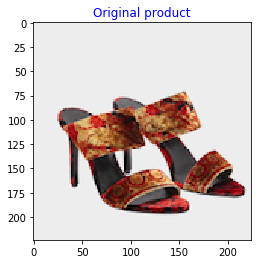

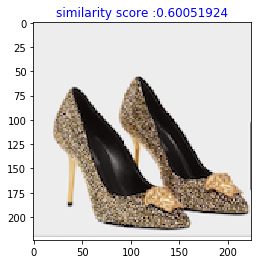

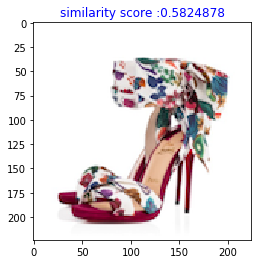

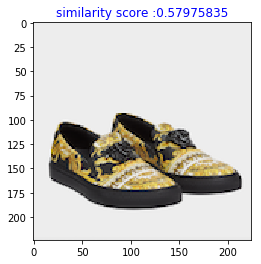

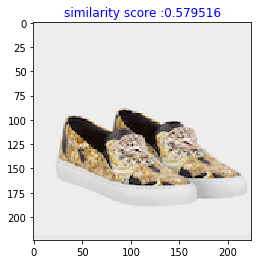

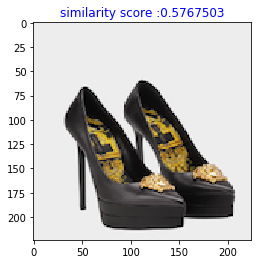

In [12]:
retrieve_most_similar_products(files[1])

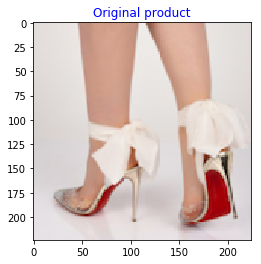

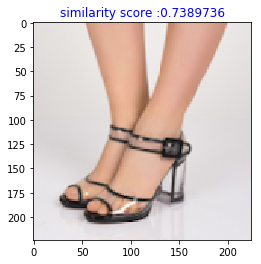

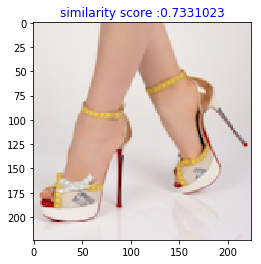

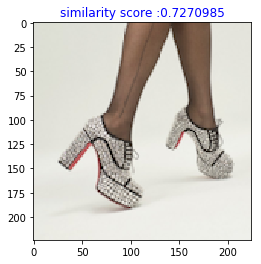

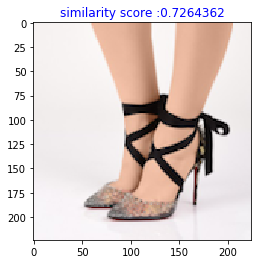

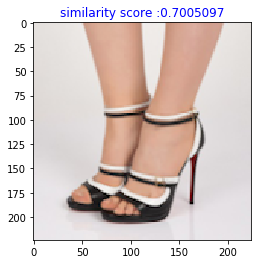

In [13]:
retrieve_most_similar_products(files[2])

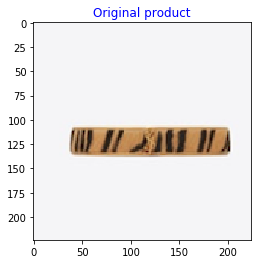

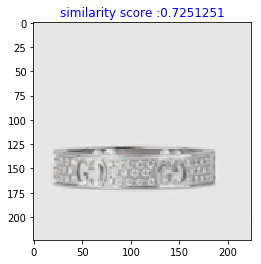

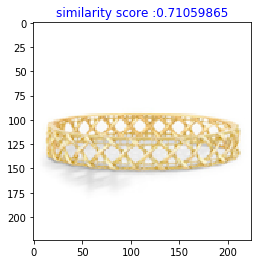

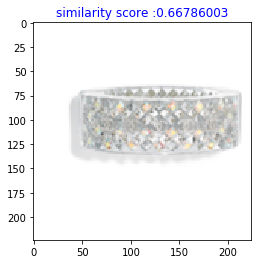

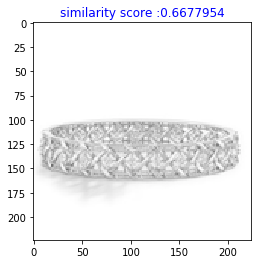

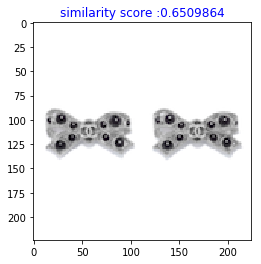

In [14]:
retrieve_most_similar_products(files[3])

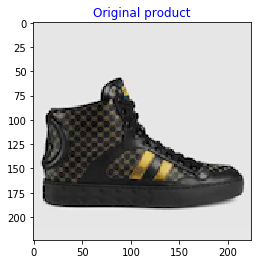

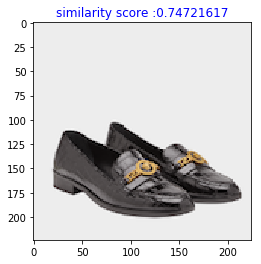

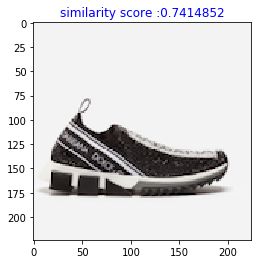

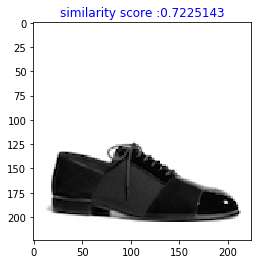

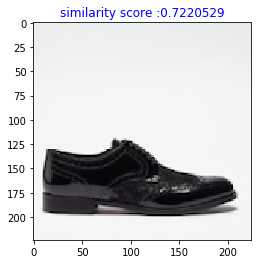

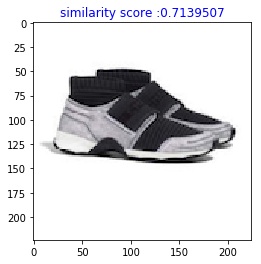

In [15]:
retrieve_most_similar_products(files[4])